# Linear Models

## Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term).
<!-- Put linear regression model prediction equation below -->
$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$$

In this equation:
- $\hat{y}$ is the predicted value.
- $n$ is the number of features.
- $x_i$ is the $i^{th}$ feature value.
- $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$).

The vectorized form of the equation is:
$$\hat{y} = h_\theta(\mathbf{x}) = \theta^T\cdot\mathbf{x}$$

In this equation:
- $\mathbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\theta$ is the model's parameter vector, containing $\theta_0$ to $\theta_n$, with $\theta_0$ always equal to 0.
- $\theta^T$ is the transpose of $\theta$.
- $\theta^T\cdot\mathbf{x}$ is the dot product of $\theta^T$ and $\mathbf{x}$.
- $h_\theta$ is the hypothesis function, using the model parameters $\theta$.

### The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution in which the result is a simple mathematical equation. This is called the Normal Equation.
<!-- Put Normal Equation below -->
$$\hat{\theta} = (\mathbf{X}^T\cdot\mathbf{X})^{-1}\cdot\mathbf{X}^T\cdot\mathbf{y}$$

In this equation:
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
- $\mathbf{y}$ is the vector of target values containing $y_1$ to $y_m$.

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

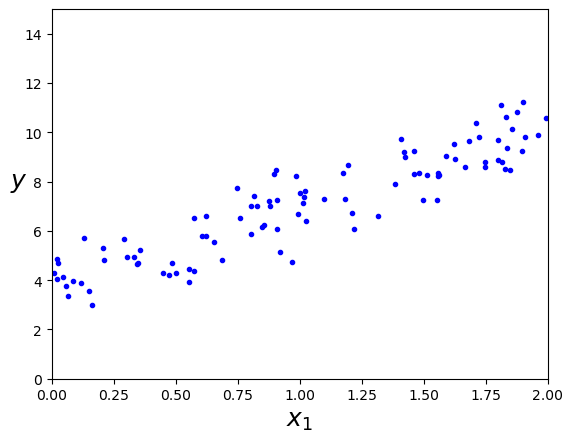

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# Computer the closed-form solution/normal equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.80418336],
       [3.17796465]])

In [5]:
# Make predictions using theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.80418336],
       [10.16011267]])

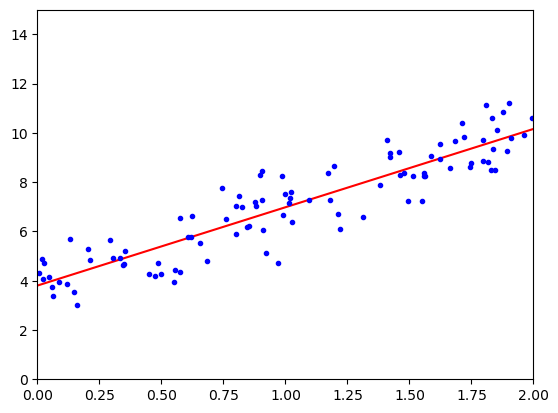

In [6]:
# Plot the model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### Using Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.80418336]), array([[3.17796465]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.80418336],
       [10.16011267]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.80418336],
       [3.17796465]])

This function computes $\hat{\theta} = \mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^+$ is the pseudoinverse of $\mathbf{X}$, which is computed using a matrix factorization technique called Singular Value Decomposition (SVD).

```python 

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.80418336],
       [3.17796465]])

The pseudoinverse itself is computed using the `pinv()` function from NumPy's Linear Algebra module (`np.linalg`), and the `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (which you could call directly).

The pseudoinverse is computed as:
$$\mathbf{X}^+ = \mathbf{V}\cdot\mathbf{\Sigma}^+\cdot\mathbf{U}^T$$

### Computational Complexity

The Normal Equation computes the inverse of $\mathbf{X}^T\cdot\mathbf{X}$, which is an $n\times n$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^2.4)$ to $O(n^3)$, depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly $2^2.4 \approx 5.3$.

### Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

#### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. This is called a partial derivative. The gradient vector containing all the partial derivatives is called the gradient vector.

The partial derivative of the MSE cost function with regards to $\theta_j$ is:
$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m(\theta^T\cdot\mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$$

The gradient vector of the cost function is:
$$\nabla_\theta MSE(\theta) = \begin{pmatrix}\frac{\partial}{\partial\theta_0}MSE(\theta) \\ \frac{\partial}{\partial\theta_1}MSE(\theta) \\ \vdots \\ \frac{\partial}{\partial\theta_n}MSE(\theta) \end{pmatrix} = \frac{2}{m}\mathbf{X}^T\cdot(\mathbf{X}\cdot\theta - \mathbf{y})$$

Gradient descent step:
$$\theta^{(\text{next step})} = \theta - \eta\nabla_\theta MSE(\theta)$$

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[3.80418336],
       [3.17796465]])

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

#### Stoachastic Gradient Descent

Stochastic Gradient Descent is the extreme opposite of Batch Gradient Descent. Instead of computing the gradients based on the full training set at every step, it computes the gradients based on just one instance. When the training set is large, this makes it possible to train the model very quickly, but it also makes it much harder for the algorithm to escape from local minima.

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [15]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

By convention, we iterate by rounds of $m$ iterations; each round is called an *epoch*. The steps of Stochastic Gradient Descent are:
1. Shuffle the training set.
2. For each instance in the training set:
    1. Compute the gradients based only on that single instance.
    2. Update the model parameters using the gradients.
3. Repeat the previous two steps until the number of epochs is reached, or until the algorithm converges to a minimum.

In [16]:
theta

array([[3.82649249],
       [3.15985164]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.80160424]), array([3.23087322]))

#### Mini-batch Gradient Descent

Mini-batch Gradient Descent computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch Gradient Descent over Stochastic Gradient Descent is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [19]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [20]:
theta

array([[3.8322377],
       [3.2220328]])

### Polynomial Regression